In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [316]:
supermarketData = pd.read_csv(
    'midterm2021.php.txt', sep=" ",header=None, delimiter=",")
print(supermarketData)

      0  1  2
0     1  2  1
1     0  2  3
2     0  2  2
3     0  2  3
4     1  0  1
...  .. .. ..
1383  1  1  2
1384  1  0  3
1385  1  0  3
1386  0  2  0
1387  0  2  0

[1388 rows x 3 columns]


##  Question 1

### Question 1a

In [317]:
sum = pd.DataFrame(supermarketData.sum(axis=1))
sum.columns = ['total']
print(sum)

      total
0         4
1         5
2         4
3         5
4         2
...     ...
1383      4
1384      4
1385      4
1386      2
1387      2

[1388 rows x 1 columns]


In [318]:
pmf = sum['total'].value_counts()
print (pmf)

3    375
4    335
2    243
5    225
6    108
1    102
Name: total, dtype: int64


      total
3  0.270173
4  0.241354
2  0.175072
5  0.162104
6  0.077810
1  0.073487


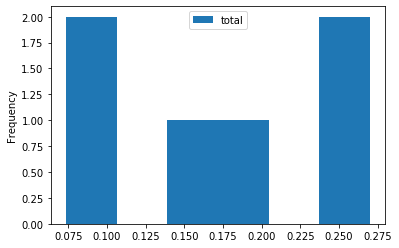

In [319]:
probabilities = pd.DataFrame(pmf.div(pmf.sum()))
print (probabilities)
probabilities.plot.hist(bins=6)

## Question 1b

In [320]:
print("Probability of values in first column")
supermarketData[0].value_counts().div(pmf.sum())

Probability of values in first column


1    0.501441
0    0.498559
Name: 0, dtype: float64

In [321]:
print("Expected Value")
expected_value =(0.501441 * 1) + (0.498559 * 0)
expected_value

Expected Value


0.501441

## Question 1c

In [322]:
supermarketData[0].value_counts()

1    696
0    692
Name: 0, dtype: int64

In [323]:
total1 = 696
sd = np.sqrt(((1-expected_value)**2)/total1)
sd

0.018897830125432724

In [324]:
cltLower = expected_value - ((2 * sd) / np.sqrt(total1))
cltUpper = expected_value + ((2 * sd) / np.sqrt(total1))
chebLower = expected_value - (sd / np.sqrt(0.05 * total1))
chebUpper = expected_value + (sd / np.sqrt(0.05 * total1))
print(cltLower, cltUpper, chebLower, chebUpper)

0.5000083591954023 0.5028736408045977 0.49823751777357955 0.5046444822264204


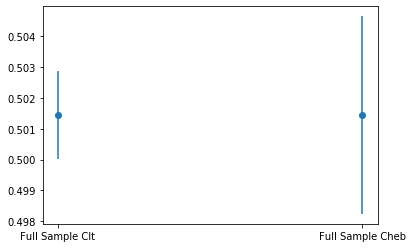

In [325]:
x = [0,1]
y = [expected_value, expected_value]
my_xticks = ['Full Sample Clt', 'Full Sample Cheb']
y_err_min = [expected_value - cltLower, expected_value - chebLower]
y_err_max = [cltUpper - expected_value, chebUpper - expected_value]
y_err = [y_err_min, y_err_max]
plt.xticks(x, my_xticks)
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.show()

## Question 2

## Question 2a

In [326]:
supermarketData[1].value_counts()

1    365
3    350
2    343
0    330
Name: 1, dtype: int64

In [327]:
one = supermarketData[supermarketData[0] == 1]
one

,0,1,2
0,1,2,1
4,1,0,1
5,1,2,0
7,1,0,2
8,1,0,1
...,...,...,...
1380,1,2,0
1381,1,1,3
1383,1,1,2
1384,1,0,3


In [328]:
one_zero = one[one[1] == 0]
len(one_zero)

330

In [329]:
one_one = one[one[1] == 1]
len(one_one)

279

In [330]:
one_two = one[one[1] == 2]
len(one_two)

87

In [331]:
one_three = one[one[1] == 3]
len(one_three)

0

## Question 2b

In [332]:
total0incol2 = 330
total1incol2 = 365
total2incol2 = 343
total3incol2 = 350
sample_mean_0 = 1.0
sample_mean_1 = 279/365
sample_mean_2 = 87/343
sample_mean_3 = 0

In [333]:
col2zero = supermarketData[supermarketData[1] == 0]
col2zero

,0,1,2
4,1,0,1
7,1,0,2
8,1,0,1
10,1,0,3
11,1,0,2
...,...,...,...
1351,1,0,0
1366,1,0,2
1376,1,0,1
1384,1,0,3


### Standard deviation and CI for when column2=0

In [334]:
col2zero['sd'] = (col2zero[0] - sample_mean_0)**2
col2zero['sd'].sum()
sd_0 = np.sqrt((col2zero['sd'].sum()) / total0incol2 )
sd_0

0.0

In [335]:
clt0lower = sample_mean_0 - ((2 * sd_0) / np.sqrt(total0incol2))
clt0upper = sample_mean_0 + ((2 * sd_0) / np.sqrt(total0incol2))
cheb0lower = sample_mean_0 - (sd_0 / np.sqrt(0.05 * total0incol2))
cheb0upper = sample_mean_0 + (sd_0 / np.sqrt(0.05 * total0incol2))
ci0 = clt0lower, clt0upper, cheb0lower, cheb0upper
ci0

(1.0, 1.0, 1.0, 1.0)

### Standard deviation and CI for when column2=1

In [336]:
col2zero = supermarketData[supermarketData[1] == 1]
col2zero['sd'] = (col2zero[0] - sample_mean_1)**2
col2zero['sd'].sum()
sd_1 = np.sqrt((col2zero['sd'].sum()) / total1incol2 )
sd_1

0.42438347320851244

In [337]:
clt1lower = sample_mean_1 - ((2 * sd_1) / np.sqrt(total1incol2))
clt1upper = sample_mean_1 + ((2 * sd_1) / np.sqrt(total1incol2))
cheb1lower = sample_mean_1 - (sd_1 / np.sqrt(0.05 * total1incol2))
cheb1upper = sample_mean_1 + (sd_1 / np.sqrt(0.05 * total1incol2))
ci1 = clt1lower, clt1upper, cheb1lower, cheb1upper
ci1

(0.7199570691979839,
 0.8088100540896873,
 0.6650429045330303,
 0.8637242187546409)

### Standard deviation and CI for when column2=2

In [338]:
col2zero = supermarketData[supermarketData[1] == 2]
col2zero['sd'] = (col2zero[0] - sample_mean_2)**2
col2zero['sd'].sum()
sd_2 = np.sqrt((col2zero['sd'].sum()) / total2incol2 )
sd_2

0.43509639897790386

In [339]:
clt2lower = sample_mean_2 - ((2 * sd_2) / np.sqrt(total2incol2))
clt2upper = sample_mean_2 + ((2 * sd_2) / np.sqrt(total2incol2))
cheb2lower = sample_mean_2 - (sd_2 / np.sqrt(0.05 * total2incol2))
cheb2upper = sample_mean_2 + (sd_2 / np.sqrt(0.05 * total2incol2))
ci2 = clt2lower, clt2upper, cheb2lower, cheb2upper
ci2

(0.20665832025512015,
 0.3006303094824892,
 0.14858043692216708,
 0.3587081928154423)

### Standard deviation and CI for when column2=3

In [340]:
col2zero = supermarketData[supermarketData[1] == 3]
col2zero['sd'] = (col2zero[0] - sample_mean_3)**2
col2zero['sd'].sum()
sd_3 = np.sqrt((col2zero['sd'].sum()) / total3incol2 )
sd_3

0.0

In [341]:
clt3lower = sample_mean_3 - ((2 * sd_3) / np.sqrt(total3incol2))
clt3upper = sample_mean_3 + ((2 * sd_3) / np.sqrt(total3incol2))
cheb3lower = sample_mean_3 - (sd_3 / np.sqrt(0.05 * total3incol2))
cheb3upper = sample_mean_3 + (sd_3 / np.sqrt(0.05 * total3incol2))
ci3 = clt3lower, clt3upper, cheb3lower, cheb3upper
ci3

(0.0, 0.0, 0.0, 0.0)

## Question 2c

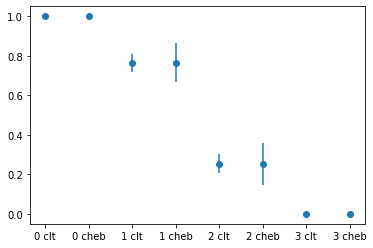

In [342]:
x = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
y = [sample_mean_0, sample_mean_0, sample_mean_1, sample_mean_1, sample_mean_2, sample_mean_2, sample_mean_3, sample_mean_3]
my_xticks = ['0 clt', '0 cheb', '1 clt', '1 cheb', '2 clt', '2 cheb', '3 clt', '3 cheb']
y_err_min = [sample_mean_0 - clt0lower, sample_mean_0 - cheb0lower, sample_mean_1 - clt1lower, sample_mean_1 - cheb1lower, sample_mean_2 - clt2lower, sample_mean_2 - cheb2lower, sample_mean_3 - clt3lower, sample_mean_3 - cheb3lower]
y_err_max = [clt0upper - sample_mean_0, cheb0upper - sample_mean_0, clt1upper - sample_mean_1, cheb1upper - sample_mean_1, clt2upper - sample_mean_2, cheb2upper - sample_mean_2, clt3upper - sample_mean_3, cheb3upper - sample_mean_3]
y_err = [y_err_min, y_err_max]
plt.xticks(x, my_xticks)
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.show()

## Question 3

In [343]:
supermarketData100 = supermarketData.head(100)
print(supermarketData100)

    0  1  2
0   1  2  1
1   0  2  3
2   0  2  2
3   0  2  3
4   1  0  1
.. .. .. ..
95  0  2  2
96  1  1  0
97  1  1  0
98  1  0  1
99  0  3  0

[100 rows x 3 columns]


### Question 3a

In [344]:
print("Question 1b and c but only with 100 first rows")
supermarketData100[0].value_counts().div(100)
expected_value100 = 0.51
total1100 = 51
sd = np.sqrt(((1-expected_value100)**2)/total1100)
print("standard deviation", sd)
cltLower100 = expected_value100 - ((2 * sd) / np.sqrt(total1100))
cltUpper100 = expected_value100 + ((2 * sd) / np.sqrt(total1100))
chebLower100 = expected_value100 - (sd / np.sqrt(0.05 * total1100))
chebUpper100 = expected_value100 + (sd / np.sqrt(0.05 * total1100))
print("clt", cltLower100, cltUpper100, "cheb", chebLower100, chebUpper100)

Question 1b and c but only with 100 first rows
standard deviation 0.06861372411737247
clt 0.4907843137254902 0.5292156862745098 cheb 0.4670324192558864 0.5529675807441136


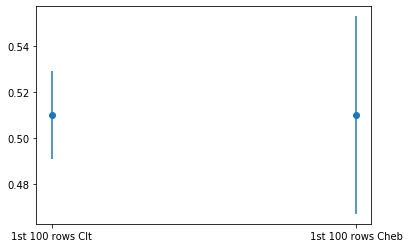

In [345]:
x = [0,1]
y = [expected_value100, expected_value100]
my_xticks = ['1st 100 rows Clt', '1st 100 rows Cheb']
y_err_min = [expected_value100 - cltLower100, expected_value100 - chebLower100]
y_err_max = [cltUpper100 - expected_value100, chebUpper100 - expected_value100]
y_err = [y_err_min, y_err_max]
plt.xticks(x, my_xticks)
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.show()

Question 2b and c but only with 100 first rows
Edited this script. Changed supermarketData to supermarketData.head(100)

### Question 3b

Question 2b and c but with column 3. Edited this script. Changed supermarketData[1] to supermarketData[2].